In [1]:
# import os
# from ..root_path import p
# os.chdir(os.path.dirname(p))
# print(os.getcwd())

from datetime import datetime


from src.issues import BEDTIME_NEWS
from src.removed import REMOVED_ANNOTAIONS

In [2]:
%config InlineBackend.figure_format='svg'

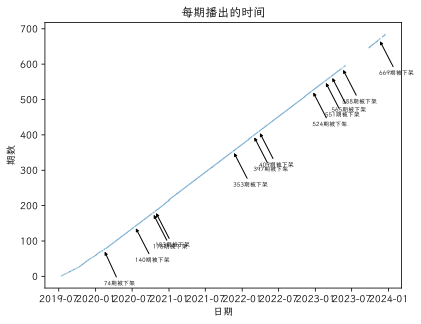

In [3]:
# setup matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams["font.sans-serif"] = ["LXGW WenKai"]
plt.title("每期播出的时间")
plt.xlabel("日期")
plt.ylabel("期数")


plt.scatter(
    x=[datetime.fromtimestamp(issue["created"]) for issue in BEDTIME_NEWS],
    y=[float(issue["issue"]) for issue in BEDTIME_NEWS],
    s=0.02,
)


for y, x in REMOVED_ANNOTAIONS:
    plt.annotate(
        xy=(datetime.fromtimestamp(x), int(y)),
        text=f"{int(y)-1}期被下架",
        xytext=(datetime.fromtimestamp(x), int(y) - 100),
        arrowprops=dict(arrowstyle="-|>", color="k"),
        fontsize=6
    )
    pass

plt.show()

可见，在2023年夏天“放暑假”前，马督工并没有被长时间禁言。

最近他还放了个小寒假，在图上清晰可见，已经无需特别标注了。

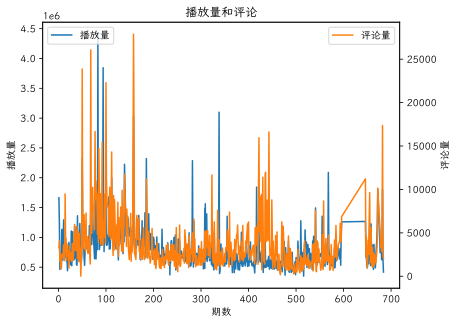

In [4]:
import pandas as pd

fig, ax = plt.subplots()
ax.set_title("播放量和评论")

ax.set_xlabel("期数")
ax.set_ylabel("播放量")

PD_BEDTIME_NEWS = pd.read_json("bedtime_news.json")

ax.plot(
    PD_BEDTIME_NEWS["issue"],
    PD_BEDTIME_NEWS["play"],
    label="播放量",
    color="tab:blue",
    # alpha=0.5,
)

ax2 = ax.twinx()
ax2.set_ylabel("评论量")

ax2.plot(
    PD_BEDTIME_NEWS["issue"],
    PD_BEDTIME_NEWS["comment"],
    label="评论量",
    color="tab:orange",
    # alpha=0.5,
)

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
# ax.plot(
#     [float(issue["issue"]) for issue in BEDTIME_NEWS],
#     [issue["play"] for issue in BEDTIME_NEWS],
#     label="播放量",
#     color="tab:blue",
# )

唔……没有什么结论。

下面我们分析文本：关注的人物、地区变化趋势。（主题？放弃算了）

In [11]:
from src.geo_result import GEO
from collections import Counter
from typing import Callable
from pprint import pprint

# PD_GEO = pd.DataFrame.from_records(GEO, index="issue")


def concat[T](l: list[list[T]]) -> list[T]:
    return [i for j in l for i in j]

def counter[T](l: list[T]) -> dict[T, int]:
    d: dict[T, int] = {}
    for i in l:
        if i not in d:
            d[i] = 0
        d[i] += 1
    return d

def count_mean[T](l: list[list[T]]) -> dict[T, float]:
    d: dict[T, int] = {}
    for i in concat(l):
        if i not in d:
            d[i] = 0
        d[i] += 1
    return {k: d[k] / len(l) for k in d}


def groupby[T, K](l: list[T], f: Callable[[T], K]) -> dict[K, list[T]]:
    d: dict[K, list[T]] = {}
    for i in l:
        k = f(i)
        if k not in d:
            d[k] = []
        d[k].append(i)
    return d


# 计算平均每一百期，每个国家/省份出现的频率
g = groupby(GEO, lambda i: i["issue"] // 100)
# pprint(g)
g1 = {
    k: {
        "country": count_mean([i["country"] for i in g[k]]),
        "province": count_mean([i["province"] for i in g[k]]),
    }
    for k in g
}
pprint(g1)

# g = PD_GEO.groupby(lambda i: i//100)
# g.describe()
# print(g.apply(lambda df: Counter(concat(df["geo"]))))
# g.transform(lambda x: concat(x))
# g.describe()

# 折线图
# df.plot(
#     y="北京",
#     label="北京",
#     color="tab:blue",
#     alpha=0.5,
# )

# fig, ax = plt.subplots()
# ax.set_title("省份和国家的平均出场次数")

# ax.set_xlabel("期数")

{0: {'country': {'中国': 0.9900990099009901,
                 '丹麦': 0.0297029702970297,
                 '乌克兰': 0.039603960396039604,
                 '乌兹别克斯坦': 0.009900990099009901,
                 '也门': 0.04950495049504951,
                 '以色列': 0.0594059405940594,
                 '伊朗': 0.0891089108910891,
                 '俄罗斯': 0.21782178217821782,
                 '保加利亚': 0.009900990099009901,
                 '利比亚': 0.0594059405940594,
                 '加拿大': 0.09900990099009901,
                 '卢旺达': 0.019801980198019802,
                 '印度': 0.25742574257425743,
                 '印度尼西亚': 0.009900990099009901,
                 '古巴': 0.009900990099009901,
                 '哈萨克斯坦': 0.009900990099009901,
                 '土耳其': 0.04950495049504951,
                 '坦桑尼亚': 0.009900990099009901,
                 '埃及': 0.04950495049504951,
                 '埃塞俄比亚': 0.0297029702970297,
                 '塞浦路斯': 0.009900990099009901,
                 '墨西哥': 0.039603960396039604,
 

In [48]:
# 将 g1 转换为 DataFrame
# 先画国家
df = pd.DataFrame({k: v["country"] for k, v in g1.items()}).T
# df.head()

# 获取方差最大的前 10 个国家
df.var().sort_values(ascending=False)[:10]

乌克兰     0.008758
印度      0.007192
韩国      0.005377
美国      0.004138
俄罗斯     0.004028
日本      0.003365
非洲      0.002998
中国      0.002584
英国      0.002513
澳大利亚    0.001825
dtype: float64

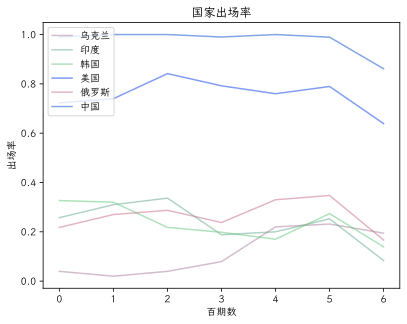

In [51]:
from numpy import random

fig, ax = plt.subplots()
ax.set_title("国家出场率")

ax.set_xlabel("百期数")
ax.set_ylabel("出场率")

for country in [
    "乌克兰",
    "印度",
    "韩国",
    "美国",
    "俄罗斯",
    # "日本",
    # "非洲",
    "中国",
    # "英国",
    # "澳大利亚",
]:
    ax.plot(
        df[country],
        label=country,
        color=random.rand(3),
        alpha=0.5,
    )
    ax.legend(loc="upper left")

# ax.plot(
#     df["中国"],
#     label="中国",
#     color=random.rand(3),
#     alpha=0.5,
# )
# ax2 = ax.twinx()

# ax2.plot(
#     df["美国"],
#     label="美国",
#     color=random.rand(3),
#     alpha=0.5,
# )

plt.show()

In [35]:
# 再画省份
df = pd.DataFrame({k: v["province"] for k, v in g1.items()}).T

# 获取方差最大的前 10 个省份
df.var().sort_values(ascending=False)[:10]



台湾     0.006682
山东     0.003931
贵州     0.003377
浙江     0.003160
云南     0.003068
黑龙江    0.002991
河北     0.002857
江苏     0.002503
广东     0.002288
香港     0.002061
dtype: float64

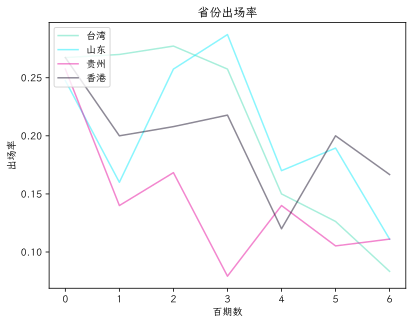

In [46]:
from numpy import random

fig, ax = plt.subplots()
ax.set_title("省份出场率")

ax.set_xlabel("百期数")
ax.set_ylabel("出场率")

for province in [
    "台湾",
    "山东",
    "贵州",
    # "浙江",
    # "云南",
    # "黑龙江",
    # "河北",
    # "江苏",
    # "广东",
    "香港",
    # "河南",
]:
    ax.plot(
        df[province],
        label=province,
        color=random.rand(3),
        alpha=0.5,
    )
    ax.legend(loc="upper left")

# ax.plot(
#     df["中国"],
#     label="中国",
#     color=random.rand(3),
#     alpha=0.5,
# )
# ax2 = ax.twinx()

# ax2.plot(
#     df["美国"],
#     label="美国",
#     color=random.rand(3),
#     alpha=0.5,
# )

plt.show()